### Agent-Lab: Vision Document Agent

Objective of this notebook is evaluating and adapting the implementation of [Multi-modal Agent](https://python.langchain.com/docs/integrations/llms/ollama/#multi-modal) specialized on documents.

---

In [1]:
%%capture
import json
import os
import nest_asyncio
from IPython.display import Image, Markdown, display
from dotenv import load_dotenv
from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

os.chdir("..")
load_dotenv()
nest_asyncio.apply()

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

---
### Upload Document:


**Image:**

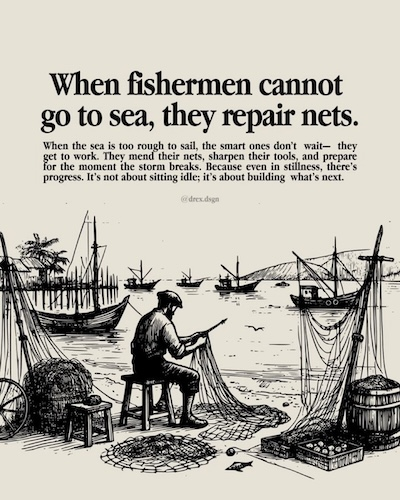

In [2]:
# create attachment
attachment_id = experiment_utils.create_attachment(
    file_path="tests/integration/vision_document_01.jpg", content_type="image/jpeg"
)
display(Markdown(f"**Image:**"))
display(Image(filename="tests/integration/vision_document_01.jpg"))

---
### XAI Grok Vision Document Agent

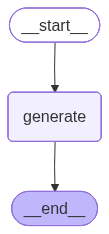

In [3]:
# Create Workflow
xai_agent = experiment_utils.create_xai_agent(
    agent_type="vision_document", llm_tag="grok-4-latest", api_key=os.getenv("XAI_API_KEY")
)
xai_vision_document_agent = container.vision_document_agent()
xai_workflow_builder = xai_vision_document_agent.get_workflow_builder(xai_agent["id"])
xai_workflow = xai_workflow_builder.compile(checkpointer=checkpointer)

experiment_utils.print_graph(xai_workflow)

In [4]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=xai_agent["id"],
    attachment_id=attachment_id,
)

inputs = xai_vision_document_agent.get_input_params(message, schema="public")
config = xai_vision_document_agent.get_config(xai_agent["id"])
result = xai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = xai_vision_document_agent.format_response(result)

In [5]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

### Comprehensive Overview and Detailed Analysis of the Document Page

#### Main Topic and Purpose
This page appears to be the introductory or standalone slide from a motivational or self-improvement document, likely part of a presentation, book, or inspirational series. The core theme revolves around a proverb: "When fishermen cannot go to sea, they repair nets." The purpose is to convey a life lesson about productivity, resilience, and proactive preparation during periods of enforced downtime or adversity. It encourages transforming obstacles into opportunities for growth, rather than idling. This is presented in a metaphorical style, using the imagery of fishermen to symbolize broader human experiences, such as career setbacks, personal challenges, or external disruptions. The page emphasizes forward-thinking action, making it suitable for contexts like personal development, business strategy, or mindfulness training. As this seems to be the first page (with no prior context provided), it sets a foundational tone for potentially building on this idea in subsequent pages.

#### Accurate Transcription of Visible Text
The page contains the following text, transcribed verbatim for precision:

- **Headline (in large, bold font):** "When fishermen cannot go to sea, they repair nets."
  
- **Explanatory Paragraph (in smaller font below the headline):** "When the sea is too rough to sail, the smart ones don't wait - they get to work. They mend their nets, sharpen their tools and prepare for the morrow. They make these breaks, forced upon them by inclement weather or other factors, into opportunities for progress. It's not about sitting idle; it's about building what's next."

- **Attribution (in small font at the bottom of the text block):** "@derek_sloan"

The text is centered on a light beige background, with a vintage or illustrative aesthetic, suggesting an inspirational quote format. There are no additional headers, footers, page numbers, or metadata visible, indicating this might be a self-contained graphic or slide.

#### Detailed Description of Visual Elements
The page features a prominent black-and-white illustration that occupies the lower half, complementing the text above it. This drawing has a classic, hand-sketched style reminiscent of 19th-century engravings or folk art, evoking a sense of timeless wisdom. Key visual components include:

- **Central Figure:** A fisherman, depicted as a middle-aged man with a beard and wearing a hat, sits on a small wooden stool. He is actively repairing a large fishing net spread out on the ground in front of him. He holds a needle or tool in one hand and a section of the net in the other, focused intently on his work. His posture is hunched forward, conveying diligence and purpose.

- **Surrounding Elements:** 
  - To the left of the fisherman, there is a coiled pile of netting or rope on the ground, adding to the scene's authenticity.
  - In front of him, the net he's repairing is detailed with visible meshes and knots, some of which appear damaged or in need of mending.
  - To the right, there are wooden crates or barrels, one of which contains what looks like fish or fishing gear, emphasizing the practical, everyday tools of the trade.
  - A small fish is illustrated on the ground near the net, possibly symbolizing the fruits of labor or the goal of preparation.

- **Background Scene:** Behind the fisherman, a coastal or harbor setting is depicted with several sailing ships or boats anchored in calm waters, their masts and sails visible. The sea appears relatively still, but the context implies it could be too rough for sailing (aligning with the text). There are distant hills or landmasses in the far background, creating depth. No stormy elements are shown directly, which keeps the focus on productive downtime rather than the adversity itself.

- **Overall Composition:** The illustration is framed naturally within the page, with the text positioned above it like a caption or title. The style uses fine line work for details like the net's texture, the man's clothing folds, and the boats' rigging, adding realism without overwhelming the simplicity. There are no colors beyond the beige background and black lines, giving it a minimalist, reflective feel. This visual reinforces the proverb by showing action in a moment of pause, making the abstract idea tangible.

No charts, tables, equations, or data visualizations are present; the page relies entirely on narrative text and illustrative art for its message.

#### Synthesis and Interpretation: Key Insights and Deeper Analysis
Beyond mere transcription, this page synthesizes a profound philosophical and practical insight into human behavior and productivity. The proverb serves as a metaphor for resilience in the face of uncontrollable circumstances—much like fishermen who cannot control the weather but can control their response to it. Let's break this down in detail to ensure no nuances are overlooked:

- **Core Metaphor and Literal Meaning:** Fishermen rely on the sea for their livelihood, but rough conditions (e.g., storms, high winds) prevent them from sailing. Instead of wasting time, wise ones use this period to "repair nets"—a literal task involving mending damaged fishing gear. The text expands this by mentioning sharpening tools and preparing for "the morrow" (tomorrow), highlighting preparation as a bridge to future success. This isn't just about maintenance; it's about enhancement, ensuring that when conditions improve, they are better equipped than before.

- **Broader Implications and Life Lessons:** 
  - **Proactivity vs. Passivity:** The page contrasts "smart ones" who "get to work" with the implied folly of "sitting idle." It teaches that enforced breaks—due to "inclement weather or other factors" (which could symbolize personal health issues, economic downturns, pandemics, or creative blocks)—are not excuses for stagnation but opportunities for "progress." This aligns with concepts in psychology (e.g., growth mindset by Carol Dweck) and productivity literature (e.g., David Allen's "Getting Things Done"), where downtime is reframed as a strategic pause.
  
  - **Opportunity in Adversity:** The phrase "make these breaks... into opportunities" underscores a positive reframe. For instance, in a business context, this could mean upskilling during a market slump or refining strategies during a project delay. In personal life, it might involve self-reflection or skill-building during unemployment or illness. The attribution to "@derek_sloan" (possibly a social media handle or author) suggests this might be from a modern influencer or writer, blending ancient wisdom with contemporary motivation.

  - **Psychological and Emotional Depth:** The text implies emotional intelligence: not resenting the "forced" breaks but embracing them for "building what's next." This fosters resilience, reducing frustration and promoting long-term success. Overlooked details include the word "sharpen their tools," which metaphorically extends to honing skills, knowledge, or relationships—ensuring nothing is taken for granted.

- **Potential Connections to Broader Document:** Without prior pages, this stands alone but could introduce a series on habits, goal-setting, or leadership. If subsequent pages build on this, they might explore real-world applications (e.g., case studies of historical figures who "repaired nets" during setbacks, like inventors iterating during failures).

- **Cultural and Historical Context:** This proverb has roots in various cultures, often attributed to fishing communities worldwide (e.g., similar sayings in Japanese or Scottish folklore). It echoes Stoic philosophy (e.g., Epictetus on focusing on what's within control) and modern self-help (e.g., Atomic Habits by James Clear). The vintage illustration enhances this timeless quality, making the message universally relatable.

- **Potential Critiques or Limitations:** While empowering, the proverb assumes access to "nets" (resources or agency), which not everyone has—e.g., systemic barriers might prevent some from "repairing." However, the page doesn't address this, focusing purely on the positive mindset.

This summary captures the page's essence in a detailed, self-contained manner, ideal for a RAG system. It enables queries like "What does the fishermen proverb mean?" or "How to stay productive during downtime?" by providing rich, interpretable content. If future pages are provided, this can connect to them by referencing the foundational metaphor of preparation amid adversity.

---
### OpenAI Vision Document Agent

In [6]:
# Create Workflow
openai_agent = experiment_utils.create_openai_agent(
    agent_type="vision_document", llm_tag="gpt-5-nano", api_key=os.getenv("OPENAI_API_KEY")
)
openai_vision_document_agent = container.vision_document_agent()
openai_workflow_builder = openai_vision_document_agent.get_workflow_builder(openai_agent["id"])
openai_workflow = openai_workflow_builder.compile(checkpointer=checkpointer)

In [7]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=openai_agent["id"],
    attachment_id=attachment_id,
)

inputs = openai_vision_document_agent.get_input_params(message, schema="public")
config = openai_vision_document_agent.get_config(openai_agent["id"])
result = openai_workflow.invoke(inputs, config)
ai_message_content, workflow_state = openai_vision_document_agent.format_response(result)

In [8]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Overview:
- Main topic: The image conveys a strong message about resilience and productive use of downtime. When direct activity is blocked (fishing at sea or rough seas), the prudent response is to repair, prepare, and build for what comes next. It frames stillness not as inactivity, but as an opportunity to strengthen operations and readiness.

Transcribed text (visible on the page):
- Heading: "When fishermen cannot go to sea, they repair nets."
- Subheading/body text: 
  "When the sea is too rough to sail, the smart ones don't wait— they get to work. They mend their nets, sharpen their tools, and prepare for the moment the storm breaks. Because even in stillness, there's progress. It's not about sitting idle; it's about building what's next."
- Attribution (small text at bottom): "@drex.dgn" (appears as the creator/credit)

Visual description and layout:
- The illustration is a black-and-white line drawing in a vintage style.
- Foreground: A single fisherman sits on a stool, actively mending a net. Nearby are nets laid out, a small basket or crate, and some tools suggesting repair work.
- Midground: More fishing gear and nets, a few crates, and a partially visible net setup.
- Background: A harbor scene with several boats docked, masts, and a calm waterline suggesting a quiet moment between storms.
- Overall mood: Calm, industrious, and practical. The scene emphasizes careful, purposeful work rather than spectacle.

Key insights and interpretation:
- Core message: Use downtime strategically. When external conditions prevent the primary activity (going to sea), focus on maintenance, readiness, and optimization to ensure future success.
- Maintenance and preparedness: Repairing nets, sharpening tools, and preparing for future disruptions are framed as essential, value-adding activities rather than idle chores.
- Progress in stillness: The text asserts that progress can occur even when external action is paused, reinforcing a growth-oriented mindset.
- Proactive mindset: The emphasis is on taking initiative (“the smart ones don’t wait”) and turning constraints into opportunities for improvement.
- Metaphor beyond fishing: The same principle applies to business, personal development, and operations—downtime can be productive if used to strengthen systems and readiness for the next challenge.

Practical implications and takeaways:
- In real-world contexts, translate the metaphor as:
  - Schedule preventive maintenance and quality checks during slower periods.
  - Sharpen skills, train staff, and refine tools and processes when immediate work is constrained.
  - Develop and review contingency plans to be ready for future disruptions (e.g., storms, market shifts).
  - Invest in process improvements and inventory readiness so that when normal activity resumes, performance is enhanced.
- Actionable steps:
  - Create a “downtime productivity” checklist (maintenance tasks, training modules, process improvements).
  - Establish regular preventive maintenance cycles (equipment, software, workflows).
  - Implement a brief planning session during slower periods to outline “what’s next” after the constraint ends.
  - Track outcomes from these downtime activities to demonstrate return on effort (reduction in downtime, faster response times, fewer defects).

Contextual relevance:
- If this page is part of a broader set on resilience, efficiency, or lean operation, it reinforces a recurring theme: efficiency and growth come from making constructive use of constraints.
- The visual and text pair reinforce a practical ethic—don’t wait for conditions to improve; condition your operations to seize the moment when they do.

Keywords and indexing cues for retrieval:
- Downtime productivity, maintenance during downtime, proactive preparation, resilience, operational readiness, continuous improvement, leverage constraints, storm readiness, nets repair metaphor, fishing motif, vintage harbor illustration.

Note on accuracy:
- All visible text has been transcribed as shown.
- Visual details are described to support understanding of the metaphor and its intended message. If you have prior pages with related themes, this page can be connected to a broader narrative about turning limitations into progress.

---
### Anthropic Vision Document Agent

In [9]:
# Create Workflow
anthropic_agent = experiment_utils.create_anthropic_agent(
    agent_type="vision_document", llm_tag="claude-3-5-haiku-latest", api_key=os.getenv("ANTHROPIC_API_KEY")
)
anthropic_vision_document_agent = container.vision_document_agent()
anthropic_workflow_builder = anthropic_vision_document_agent.get_workflow_builder(anthropic_agent["id"])
anthropic_workflow = anthropic_workflow_builder.compile(checkpointer=checkpointer)

In [10]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=anthropic_agent["id"],
    attachment_id=attachment_id,
)

inputs = anthropic_vision_document_agent.get_input_params(message, schema="public")
config = anthropic_vision_document_agent.get_config(anthropic_agent["id"])
result = anthropic_workflow.invoke(inputs, config)
ai_message_content, workflow_state = anthropic_vision_document_agent.format_response(result)

In [11]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Let me provide a comprehensive analysis of this image:

Key Topic: Fishermen's Resilience and Adaptation in Challenging Maritime Conditions

The image depicts a profound proverb about fishermen's resourcefulness: "When fishermen cannot go to sea, they repair nets." This illustration is a rich visual metaphor for proactive problem-solving and making productive use of enforced downtime.

Detailed Observations:
- Visual Style: A black and white sketch/engraving-style illustration with intricate details
- Setting: A maritime scene with multiple fishing boats in the background
- Central Figure: A solitary fisherman seated on a stool, meticulously repairing fishing nets
- Surrounding Elements:
  * Fishing nets spread out
  * A wooden barrel
  * A wheel or cart wheel
  * Multiple boats anchored in what appears to be a harbor or coastal area

Key Insights from the Proverb:
1. Adaptability: When external conditions (rough seas) prevent primary work, skilled workers pivot to productive alternative tasks
2. Preparation: Maintenance of tools and equipment is crucial during unproductive periods
3. Resilience: The fisherman doesn't idle but uses time strategically to improve his future work capabilities

The quote beneath the image elaborates: "When the sea is too rough to sail, the smart ones don't wait—they get to work. They mend their nets, sharpen their tools, and prepare for the moment the storm breaks. Because even in setbacks, there's progress. It's not about sitting idle; it's about building what's next."

This illustration powerfully communicates a universal principle of resilience, proactive preparation, and turning potential obstacles into opportunities for improvement and growth.

---
### Ollama Vision Document Agent

In [12]:
# Create Workflow
ollama_agent = experiment_utils.create_ollama_agent(
    agent_type="vision_document", llm_tag="gemma3:12b", ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
)
ollama_vision_document_agent = container.vision_document_agent()
ollama_workflow_builder = ollama_vision_document_agent.get_workflow_builder(ollama_agent["id"])
ollama_workflow = ollama_workflow_builder.compile(checkpointer=checkpointer)

In [13]:
%%capture

message = MessageRequest(
    message_role="human",
    message_content="You are studying this material, please generate a comprehensive overview, explain with details. Make sure your analysis does not overlook details.",
    agent_id=ollama_agent["id"],
    attachment_id=attachment_id,
)

inputs = ollama_vision_document_agent.get_input_params(message, schema="public")
config = ollama_vision_document_agent.get_config(ollama_agent["id"])
result = ollama_workflow.invoke(inputs, config)
ai_message_content, workflow_state = ollama_vision_document_agent.format_response(result)

In [14]:
display(Markdown(f"**AI Message Content:**\n\n{ai_message_content}"))

**AI Message Content:**

Here's a detailed analysis and comprehensive overview of the image, suitable for RAG integration:

**Overall Summary:**

The image conveys a message about resilience, preparation, and productivity in the face of adversity. It depicts fishermen engaged in the essential work of repairing and maintaining their nets and equipment during a time when sailing is impossible due to rough seas. The accompanying text emphasizes that even in periods of inactivity, progress is still possible through purposeful action.

**Detailed Breakdown:**

*   **Visual Description:** The image is a black and white illustration, depicting a coastal scene. Several fishing boats are anchored in a calm bay, nestled between what appear to be cliffs or hills. The primary focus is on a group of fishermen actively engaged in repairing large fishing nets. One fisherman is centrally positioned, seated on a stool, diligently working on a net. Other fishermen are scattered around the scene, either working on nets or tending to other equipment. There are several wooden crates stacked in the background, likely holding supplies or captured fish.
*   **Textual Analysis:** The accompanying text reads: "When the sea is too rough to sail, the smart ones don't wait— they mend their nets, sharpen their tools, and prepare for the moment the storm breaks. Because even in stillness, there’s progress. It’s not about sitting idle; it’s about building what’s next."
*   **Interpretation of Key Elements:**

    *   **Rough Sea/Inability to Sail:** The "rough sea" signifies a situation where immediate action or advancement is blocked. It represents challenges or obstacles that prevent forward progress.
    *   **Net Repair:** The act of repairing the nets symbolizes productive activity during downtime. It's a metaphor for making the most of difficult circumstances and preparing for future opportunities.
    *   **Sharpening Tools:**  Reflects the importance of continuous improvement and ensuring readiness for when conditions change.
    *   **"Smart Ones"**: Identifies individuals who take proactive approaches instead of reacting passively.
    *   **Stillness & Progress:** The text highlights that inactivity doesn't equate to stagnation; it's a chance to prepare and improve, laying the groundwork for future success.
*   **Artistic Style & Tone:** The illustration style is detailed, suggesting a sense of realism and emphasizing the importance of the work being depicted. The overall tone is encouraging and emphasizes the value of perseverance and proactive preparation.
*   **Symbolic Significance:** The image serves as a visual metaphor for resilience and the importance of using downtime to strengthen one's capabilities. It underscores the idea that setbacks are not failures, but opportunities for growth and preparation.

**RAG Suitability Points:**

*   **Key Concept Extraction:** This image/text pairing represents the concept of *productive downtime*, *proactive preparation*, and *resilience*.
*   **Example Application:** Could be used to illustrate the principle of continuous improvement in project management, or to motivate teams during periods of change or disruption.
*   **Query Support:** This page could effectively answer queries such as: "How can I stay productive during setbacks?" or "What is the value of preparation?"